# import libraries

In [2]:
import pandas as pd
import time
import os
import sys
import time
# Define the relative path to the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the parent directory to sys.path
sys.path.append(parent_dir)
import util

print(parent_dir)
available_tissues = ["brain", "kidney", "bladder","uterus","cervix_ectocervix","fallopian_tube"]
tissue1 = "bladder"
tissue2 = "uterus"


C:\Users\z004kuwf\Master_thesis\TPM


# if user doens't have gene expression data

## get sample id

In [ ]:
util.extract_and_save_gtex_columns("gene_reads_2017-06-05_v8_bladder.gct.gz", f"{tissue1}_samples.txt")
util.extract_and_save_gtex_columns("gene_reads_2017-06-05_v8_uterus.gct.gz", f"{tissue2}_samples.txt")


## read GTEX gene/transcript data

In [ ]:
transcript_gz_file_path = os.path.join(parent_dir, "GTEx_Analysis_2017-06-05_v8_RSEMv1.3.0_transcript_tpm.gct.gz")

sample_tissue1 = f"{tissue1}_samples.txt"
sample_tissue2 = f"{tissue2}_samples.txt"

output_file_path_tissue1 = f"transcript_{tissue1}.txt"
output_file_path_tissue2 = f"transcript_{tissue2}.txt"

# Read and process transcript data
util.read_transcript(transcript_gz_file_path, sample_tissue1, output_file_path_tissue1)
util.read_transcript(transcript_gz_file_path, sample_tissue2, output_file_path_tissue2)
gene_gz_file_path = os.path.join(parent_dir, "GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz")

output_file_path_tissue1 = f"gene_{tissue1}.txt"
output_file_path_tissue2 = f"gene_{tissue2}.txt"

# Read and process gene data
util.read_gene(gene_gz_file_path, sample_tissue1, output_file_path_tissue1)
util.read_gene(gene_gz_file_path, sample_tissue2, output_file_path_tissue2)

# protein-coding /low expression filtering on transciprt/gene data

In [7]:
# Genes or transcripts were removed if they had zero read counts in more than 1/50 of the total number of samples 

start_time = time.time()
# Perform tissue analysis
util.preprocessing_data(tissue1, available_tissues,1/50,-1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 321.4346663951874 seconds


In [8]:
# Genes or transcripts were removed if they had zero read counts in more than 1/50 of the total number of samples 

start_time = time.time()
# Perform tissue analysis
util.preprocessing_data(tissue2, available_tissues,1/50,-1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 550.6071488857269 seconds


# grn boost

In [7]:
start_time = time.time()
util.run_grnboost(tissue1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 59252 instead
  warnings.warn(
C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\client.py:3163: UserWarning: Sending large graph of size 33.09 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2024-06-09 06:20:21,129 - distributed.nanny - WARNING - Worker process still alive after 3.1997497558593753 seconds, killing
2024-06-09 06:20:21,281 - distributed.nanny - WARNING - Worker process still alive after 3.1999980163574224 seconds, killing
2024-06-09 06:20:21,311 - distributed.nanny - WARNING - Worker process still alive after 3.1999983215332035 seconds, killing
2024-06-09 06:20:21,382 - distributed.nanny - WARNING - Worker process still alive after 3.1999983215332035 seconds, killing


Execution Time: 5368.231757879257 seconds


In [8]:

start_time = time.time()
util.run_grnboost(tissue2)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62649 instead
  warnings.warn(
C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\client.py:3163: UserWarning: Sending large graph of size 80.69 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2024-06-09 21:14:26,921 - distributed.nanny - WARNING - Worker process still alive after 3.199974670410157 seconds, killing


Execution Time: 23338.582384824753 seconds


# Construcing a GRN (gene+isoform)

In [14]:
start_time = time.time()
network_tissue1=util.grn_mapping(tissue1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 755.2140064239502 seconds


In [16]:
start_time = time.time()
network_tissue2=util.grn_mapping(tissue2)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


Execution Time: 793.3710041046143 seconds


# differential expression analysis

## creating meta data 

In [16]:
import pandas as pd

util.meta(tissue1,tissue2)

None


## two tissues combined gene expression data

In [2]:
combined_expression_df = util.gene_expression_sum(tissue1, tissue2)
print(combined_expression_df)

                 GTEX-OIZF-1926-SM-7PBZS  GTEX-P44H-2226-SM-E9U4P  \
Gene_ID                                                             
ENSG00000000003                    5.470                   27.410   
ENSG00000000419                   73.080                   53.920   
ENSG00000000457                   11.930                    8.028   
ENSG00000000460                    2.301                    3.180   
ENSG00000000938                   14.810                   23.340   
...                                  ...                      ...   
ENST00000640253                    0.000                    0.000   
ENST00000640484                    0.000                    0.000   
ENST00000640707                    0.000                    0.000   
ENST00000640728                    0.000                    0.000   
ENST00000640924                    0.000                    0.000   

                 GTEX-QEL4-1826-SM-EZ6KU  GTEX-RN64-2426-SM-EZ6L2  \
Gene_ID                          

## run differential_expression.R

# aggregation data with differential gene analysis results

In [2]:
tissue1_df = pd.read_csv(f'{tissue1}_df.csv')
tissue2_df = pd.read_csv(f'{tissue2}_df.csv')
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'
start_time = time.time()

start_time = time.time()
# common TFs based merge
TF_df=util.aggregation("TF_gene", tissue1, tissue2, tissue1_df, tissue2_df, diff_expression_df)
print(TF_df)

# common targets based merge
target_df=util.aggregation("target_gene",tissue1, tissue2, tissue1_df, tissue2_df,diff_expression_df)
print(target_df)

# Concat dataframes
combined_table = pd.concat([TF_df, target_df], ignore_index=True)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

             TF_gene tissue_bladder TF_transcript_id_bladder  \
0    ENSG00000129194        bladder          ENST00000570788   
1    ENSG00000134107        bladder          ENST00000467610   
2    ENSG00000175727        bladder          ENST00000541750   
3    ENSG00000175197        bladder          ENST00000346473   
4    ENSG00000197757        bladder          ENST00000243108   
..               ...            ...                      ...   
581  ENSG00000179388        bladder          ENST00000317216   
582  ENSG00000179583        bladder          ENST00000324288   
583  ENSG00000185499        bladder          ENST00000485118   
584  ENSG00000106571        bladder          ENST00000395925   
585  ENSG00000221869        bladder          ENST00000408965   

    target_gene_bladder target_transcript_id_bladder  importance_bladder  \
0       ENSG00000204592              ENST00000493699            7.219882   
1       ENSG00000136040              ENST00000258526            6.828079   
2  

# Tissue specific isoform % 

In [3]:
start_time = time.time()

util.isoform_gene_expression_data("bladder_filtered_tr.txt", "bladder_samples.txt",tissue1)
util.isoform_gene_expression_data("uterus_filtered_tr.txt", "uterus_samples.txt",tissue2)
grouped_table=util.isoform(tissue1, tissue2, f'{tissue1}_expression.csv', f'{tissue2}_expression.csv')
isoform_table=util.merge_grn_with_percentages(combined_table,grouped_table, tissue1, tissue2)
util.map_names(isoform_table, "gene_mapping.csv", "transcript_mapping.csv", tissue1, tissue2)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 124.08545422554016 seconds


# Gene set enrichment analysis prerank

2024-06-23 17:01:05,760 [INFO] Input gene rankings contains duplicated IDs
2024-06-23 17:01:05,766 [WARNING] Duplicated values found in preranked stats: 10.90% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-23 17:01:05,767 [INFO] Parsing data files for GSEA.............................
2024-06-23 17:01:05,768 [INFO] Enrichr library gene sets already downloaded in: C:\Users\z004kuwf\.cache/gseapy, use local file
2024-06-23 17:01:05,858 [INFO] 5389 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-23 17:01:05,858 [INFO] 0018 gene_sets used for further statistical testing.....
2024-06-23 17:01:05,858 [INFO] Start to run GSEA...Might take a while..................
2024-06-23 17:01:05,926 [INFO] Congratulations. GSEApy runs successfully................



      Name                                               Term        ES  \
0  prerank           Regulation Of Cell Adhesion (GO:0030155) -0.739293   
1  prerank           Skeletal System Development (GO:0001501) -0.577818   
2  prerank  Regulation Of DNA-templated Transcription (GO:... -0.444797   
3  prerank          Protein Modification Process (GO:0036211) -0.525624   
4  prerank  Positive Regulation Of Cellular Process (GO:00... -0.473333   

        NES NOM p-val FDR q-val FWER p-val Tag %  Gene %  \
0 -1.665877  0.012365  0.244082      0.137   4/5  19.87%   
1 -1.302011  0.153971       1.0      0.737   2/5  10.90%   
2  -1.26034  0.207154  0.925676      0.797  2/10   4.49%   
3 -1.256913  0.203175   0.70353      0.802   3/6  17.95%   
4 -1.134156  0.329173  0.899991       0.93   6/6  55.13%   

                            Lead_genes  
0            PDE3B;EPHA7;EPB41L4B;IL18  
1                           PITX1;HHIP  
2                           PITX1;TBX5  
3                  EPHA7

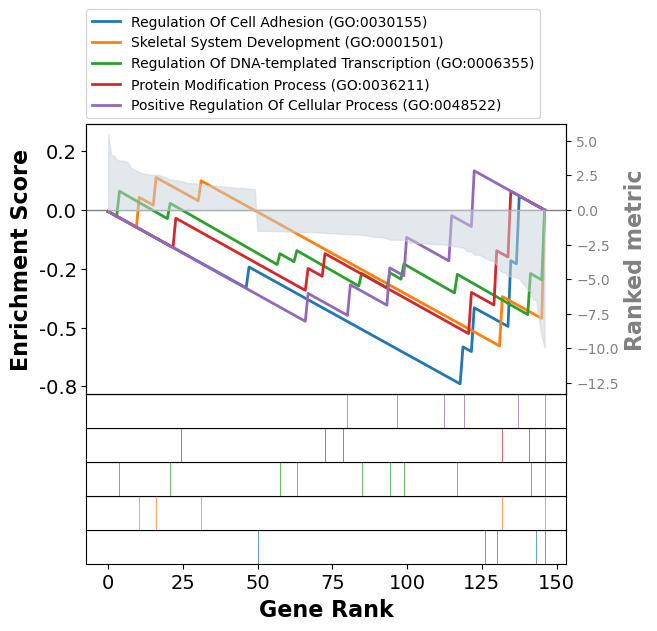

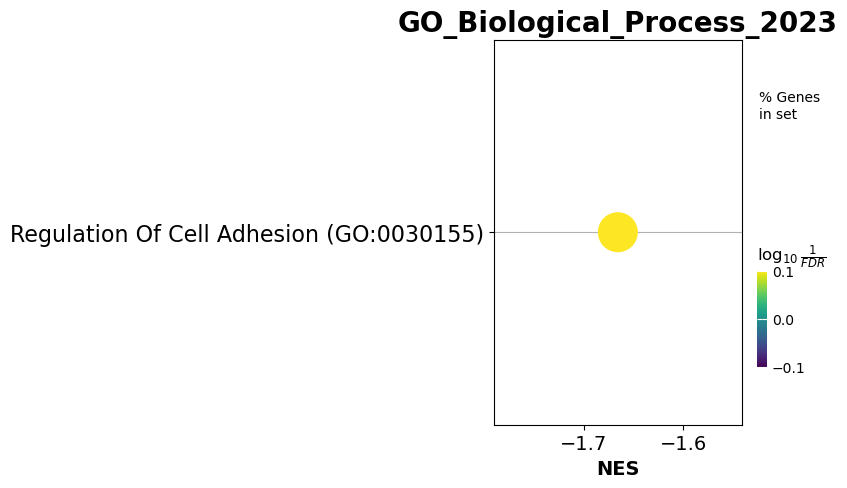

In [2]:
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'

util.run_gsea(tissue1,diff_expression_df)


2024-06-23 17:01:14,796 [INFO] Input gene rankings contains duplicated IDs
2024-06-23 17:01:14,816 [WARNING] Duplicated values found in preranked stats: 20.37% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-23 17:01:14,818 [INFO] Parsing data files for GSEA.............................
2024-06-23 17:01:14,819 [INFO] Enrichr library gene sets already downloaded in: C:\Users\z004kuwf\.cache/gseapy, use local file


      Name                                               Term        ES  \
0  prerank  Anterior/Posterior Pattern Specification (GO:0...  0.765222   
1  prerank            Vesicle-Mediated Transport (GO:0016192) -0.765378   
2  prerank  Positive Regulation Of Macromolecule Metabolic...    0.7527   
3  prerank         Regulation Of Gene Expression (GO:0010468)   0.54707   
4  prerank  Positive Regulation Of Gene Expression (GO:001...  0.685328   

        NES NOM p-val FDR q-val FWER p-val Tag %  Gene %  \
0  1.908659  0.001988  0.106177      0.046   5/6  19.14%   
1 -1.869629  0.001931  0.038496      0.076   4/5  16.67%   
2  1.845403  0.005882  0.105372      0.087   4/6   9.26%   
3  1.774443  0.008097  0.133525      0.161  5/13   9.26%   
4  1.769216  0.013861   0.10497      0.165   4/7   9.26%   

                    Lead_genes  
0  WT1;HOXD9;HOXD4;HOXC4;HOXC6  
1     RAB25;EPN3;SCARA5;RAB27B  
2          WT1;TCF23;SFRP4;PGR  
3     WT1;TCF23;SFRP4;ESR1;PGR  
4          WT1;TCF23;SF

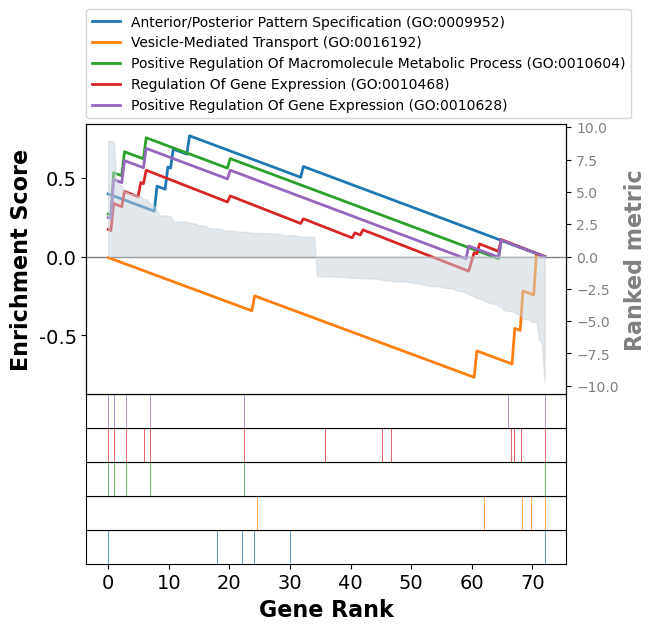

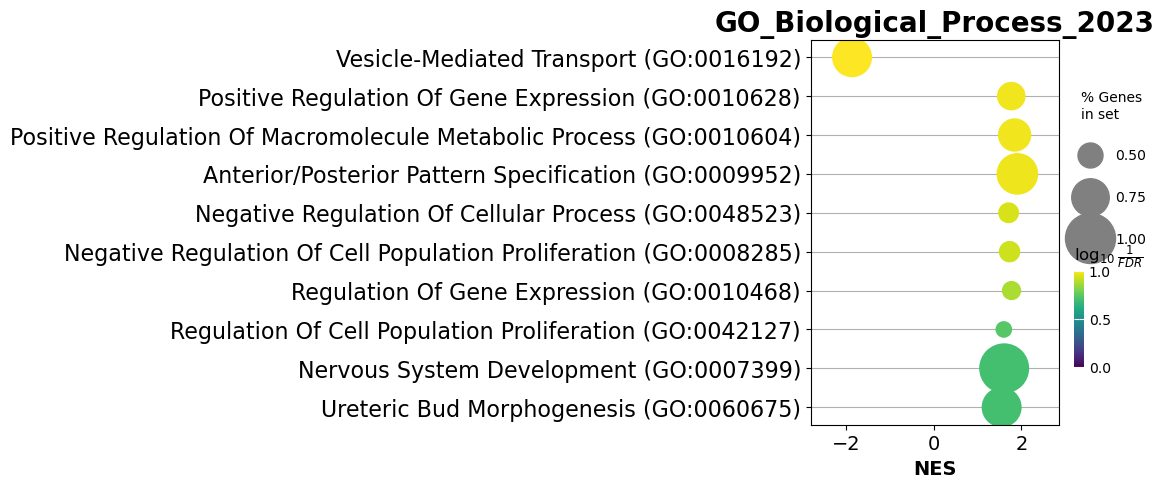

In [3]:


# Example usage
util.run_gsea(tissue2,diff_expression_df)
